In [1]:
import scanpy as sc
from matplotlib import rcParams
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures
adata = sc.read_csv('marrow_sample_scseq_counts.csv.gz')
sc.pp.recipe_zheng17(adata)
adata

AnnData object with n_obs × n_vars = 4142 × 999
    obs: 'n_counts_all'
    var: 'n_counts', 'mean', 'std'
    uns: 'log1p'

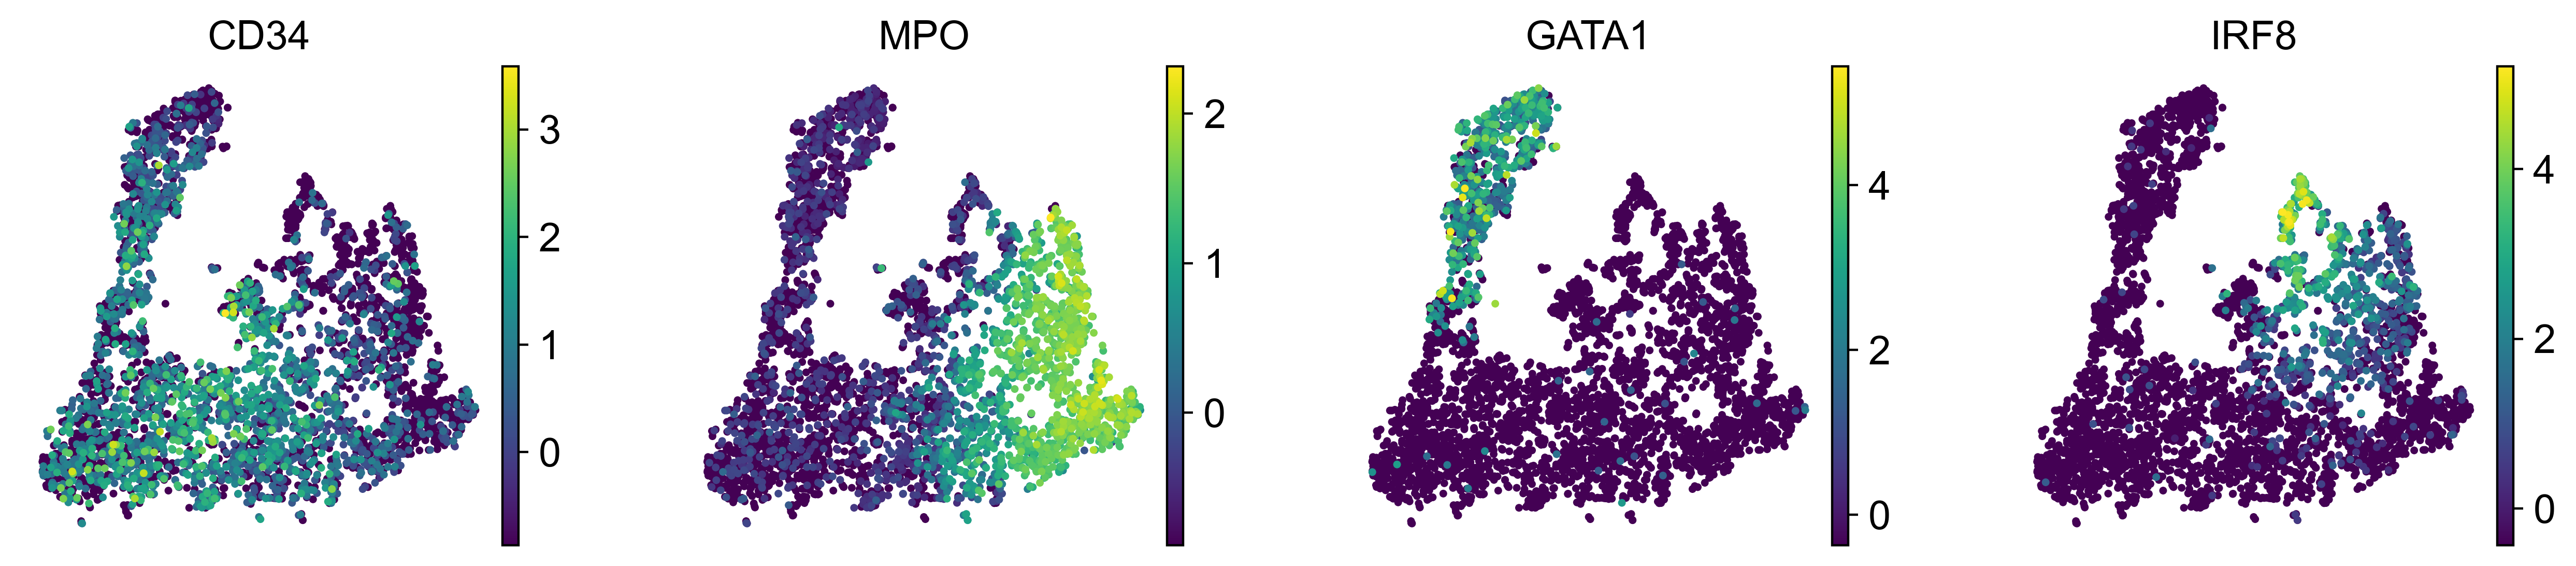

In [7]:
sc.tl.pca(adata, svd_solver='arpack')
sc.tl.tsne(adata, n_pcs=20)
fig = sc.pl.tsne(adata,color = ['CD34', 'MPO', 'GATA1', 'IRF8'],return_fig = True)

In [9]:
fig.savefig('bone_marrow_marker.pdf')

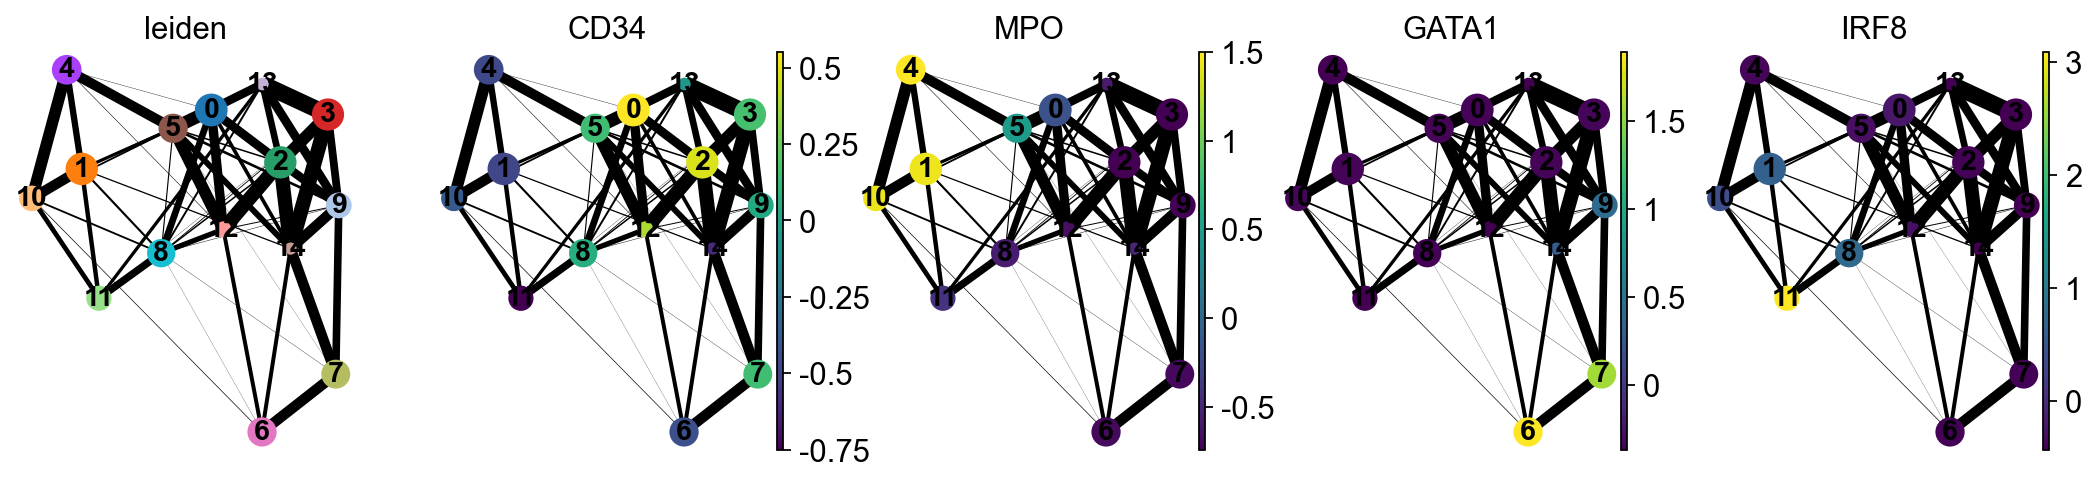

In [3]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.leiden(adata, resolution=1.0)
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, color=['leiden', 'CD34', 'MPO', 'GATA1', 'IRF8'])

In [35]:
import importlib
import pyMuTrans as pm
importlib.reload(pm)
par = {"choice_distance":"cosine","K_cluster":5.0,"trials":50,"weight_scale":True,"initial":"pca","reduce_large_scale":True,"reduce_num_meta_cell":1200.0} 
adata = pm.dynamical_analysis(adata,par)

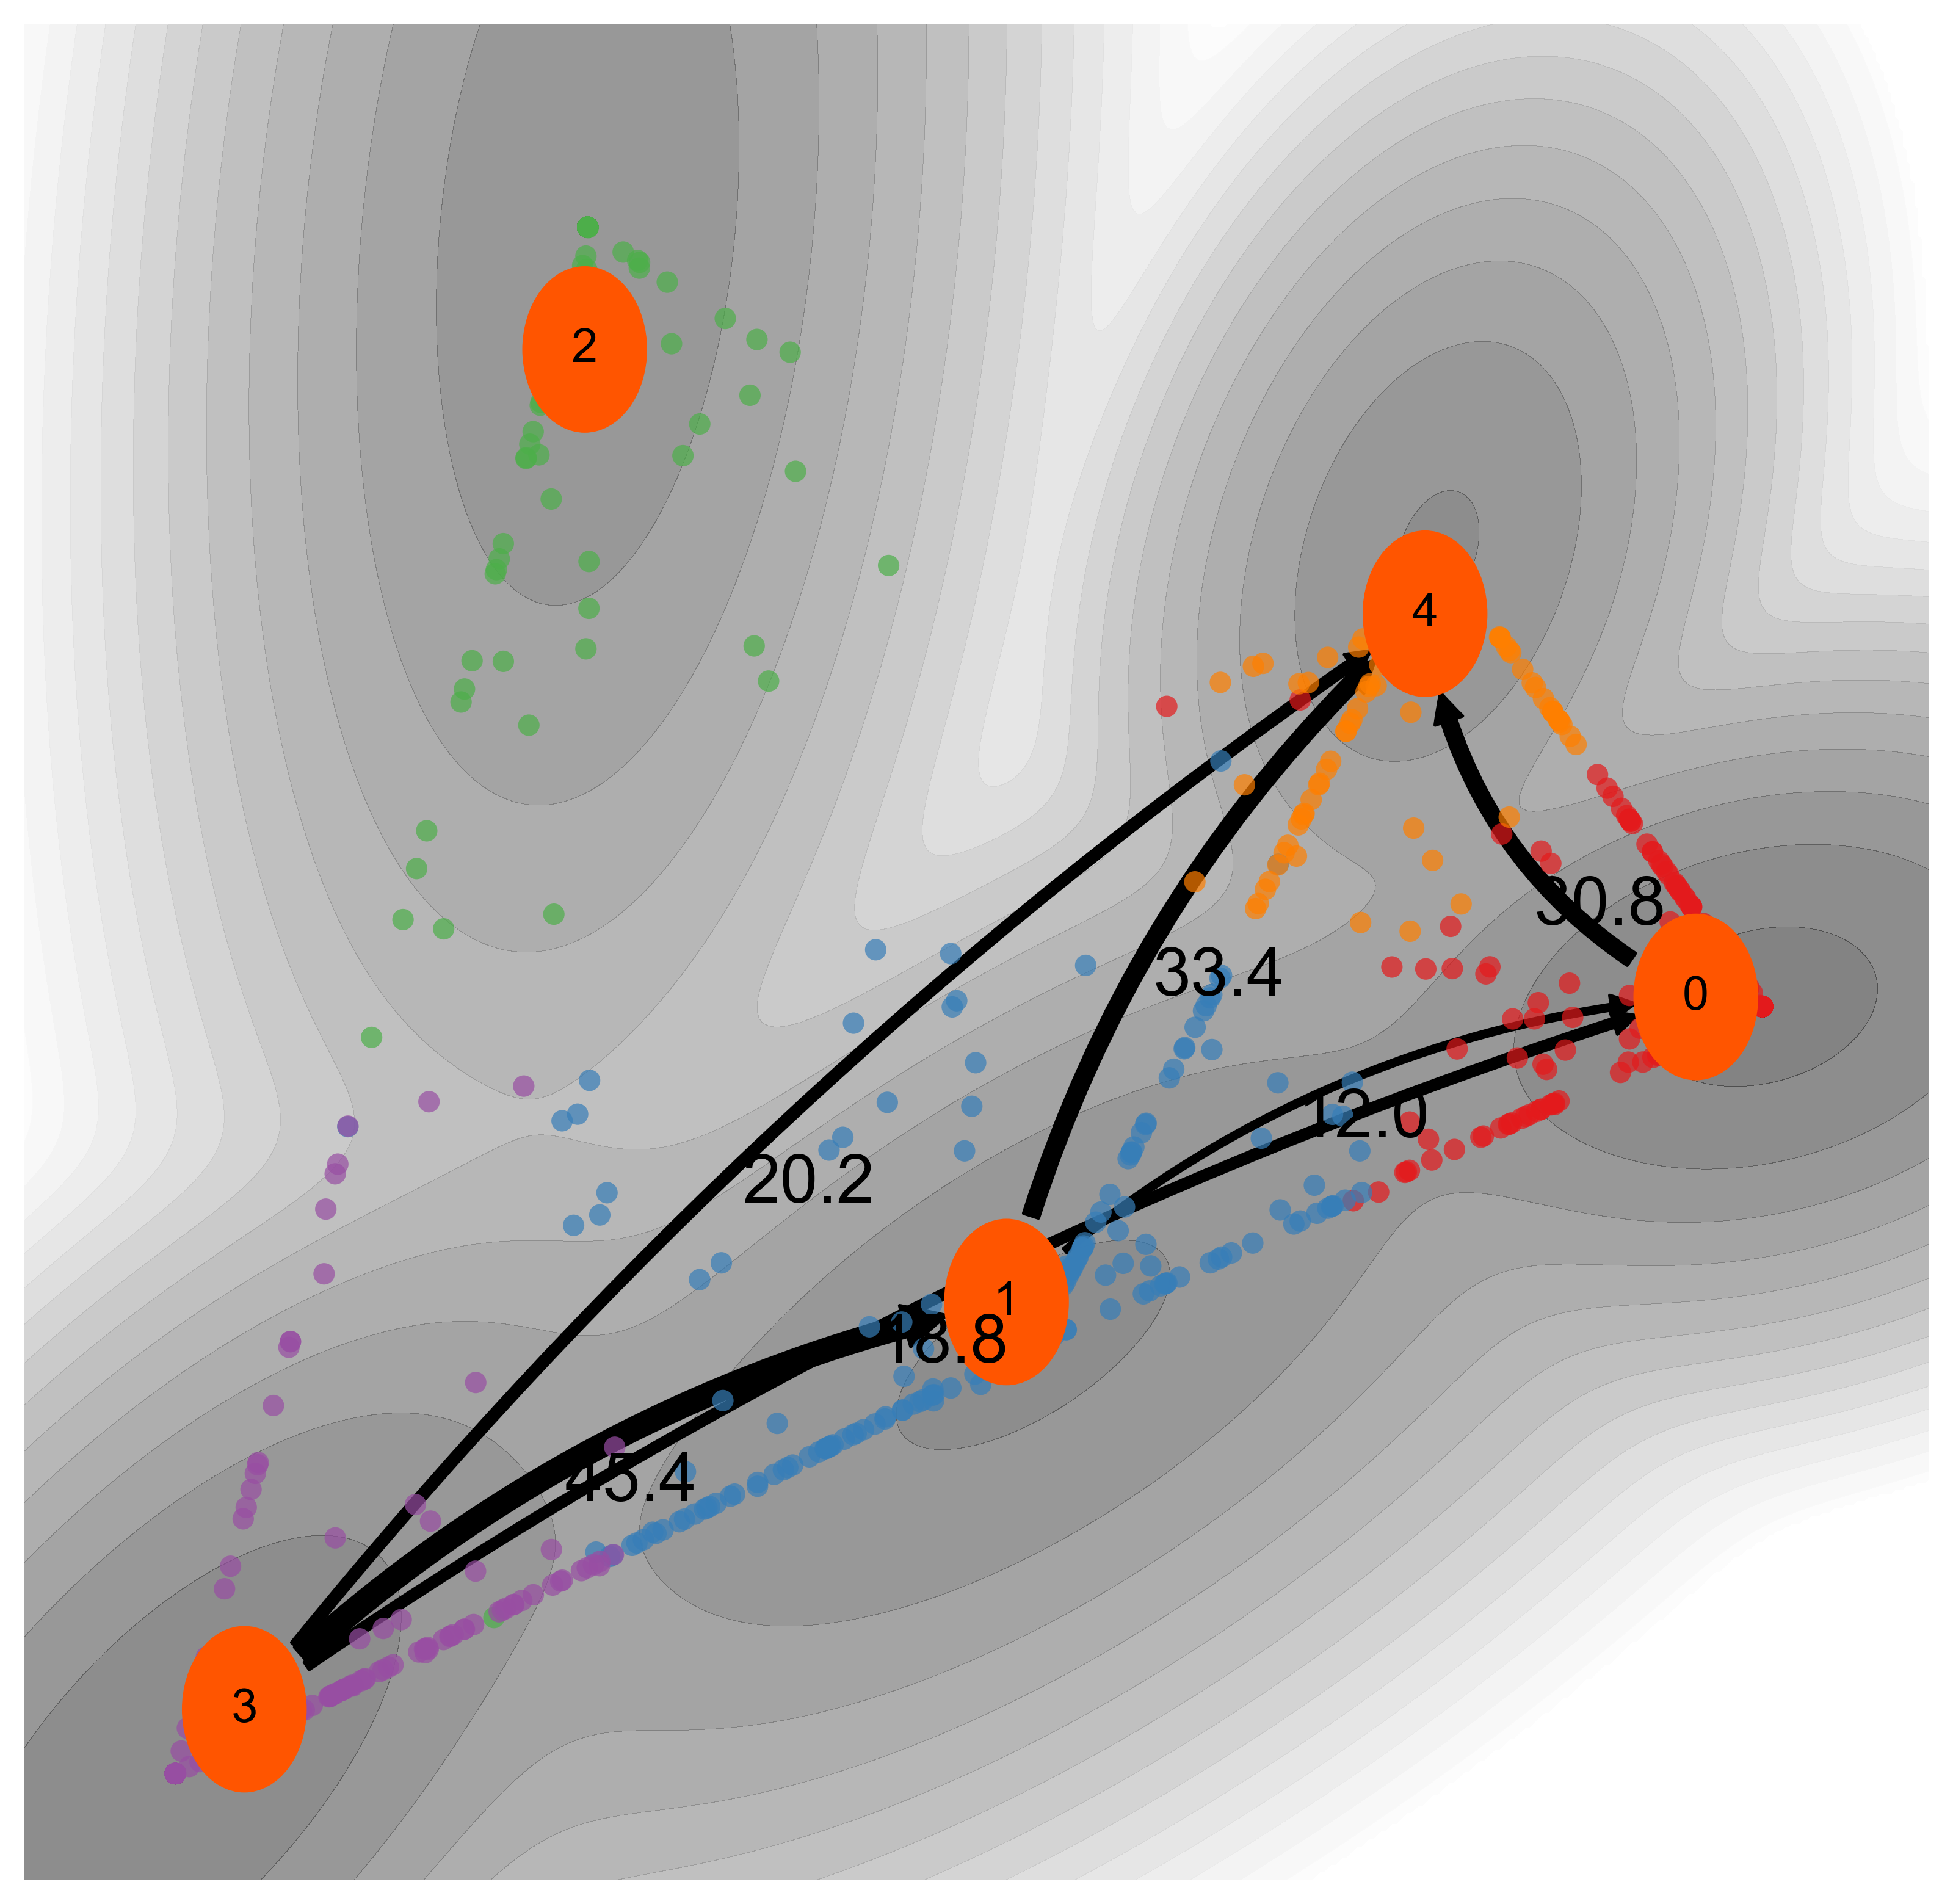

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
pm.infer_lineage(adata,si=3,sf = 4,method = "MPPT",flux_fraction = 0.8,size_state = 0.2,size_point =40,size_text=20,alpha_point = 0.7)
fig.savefig('bm_reduction_mppt.pdf')

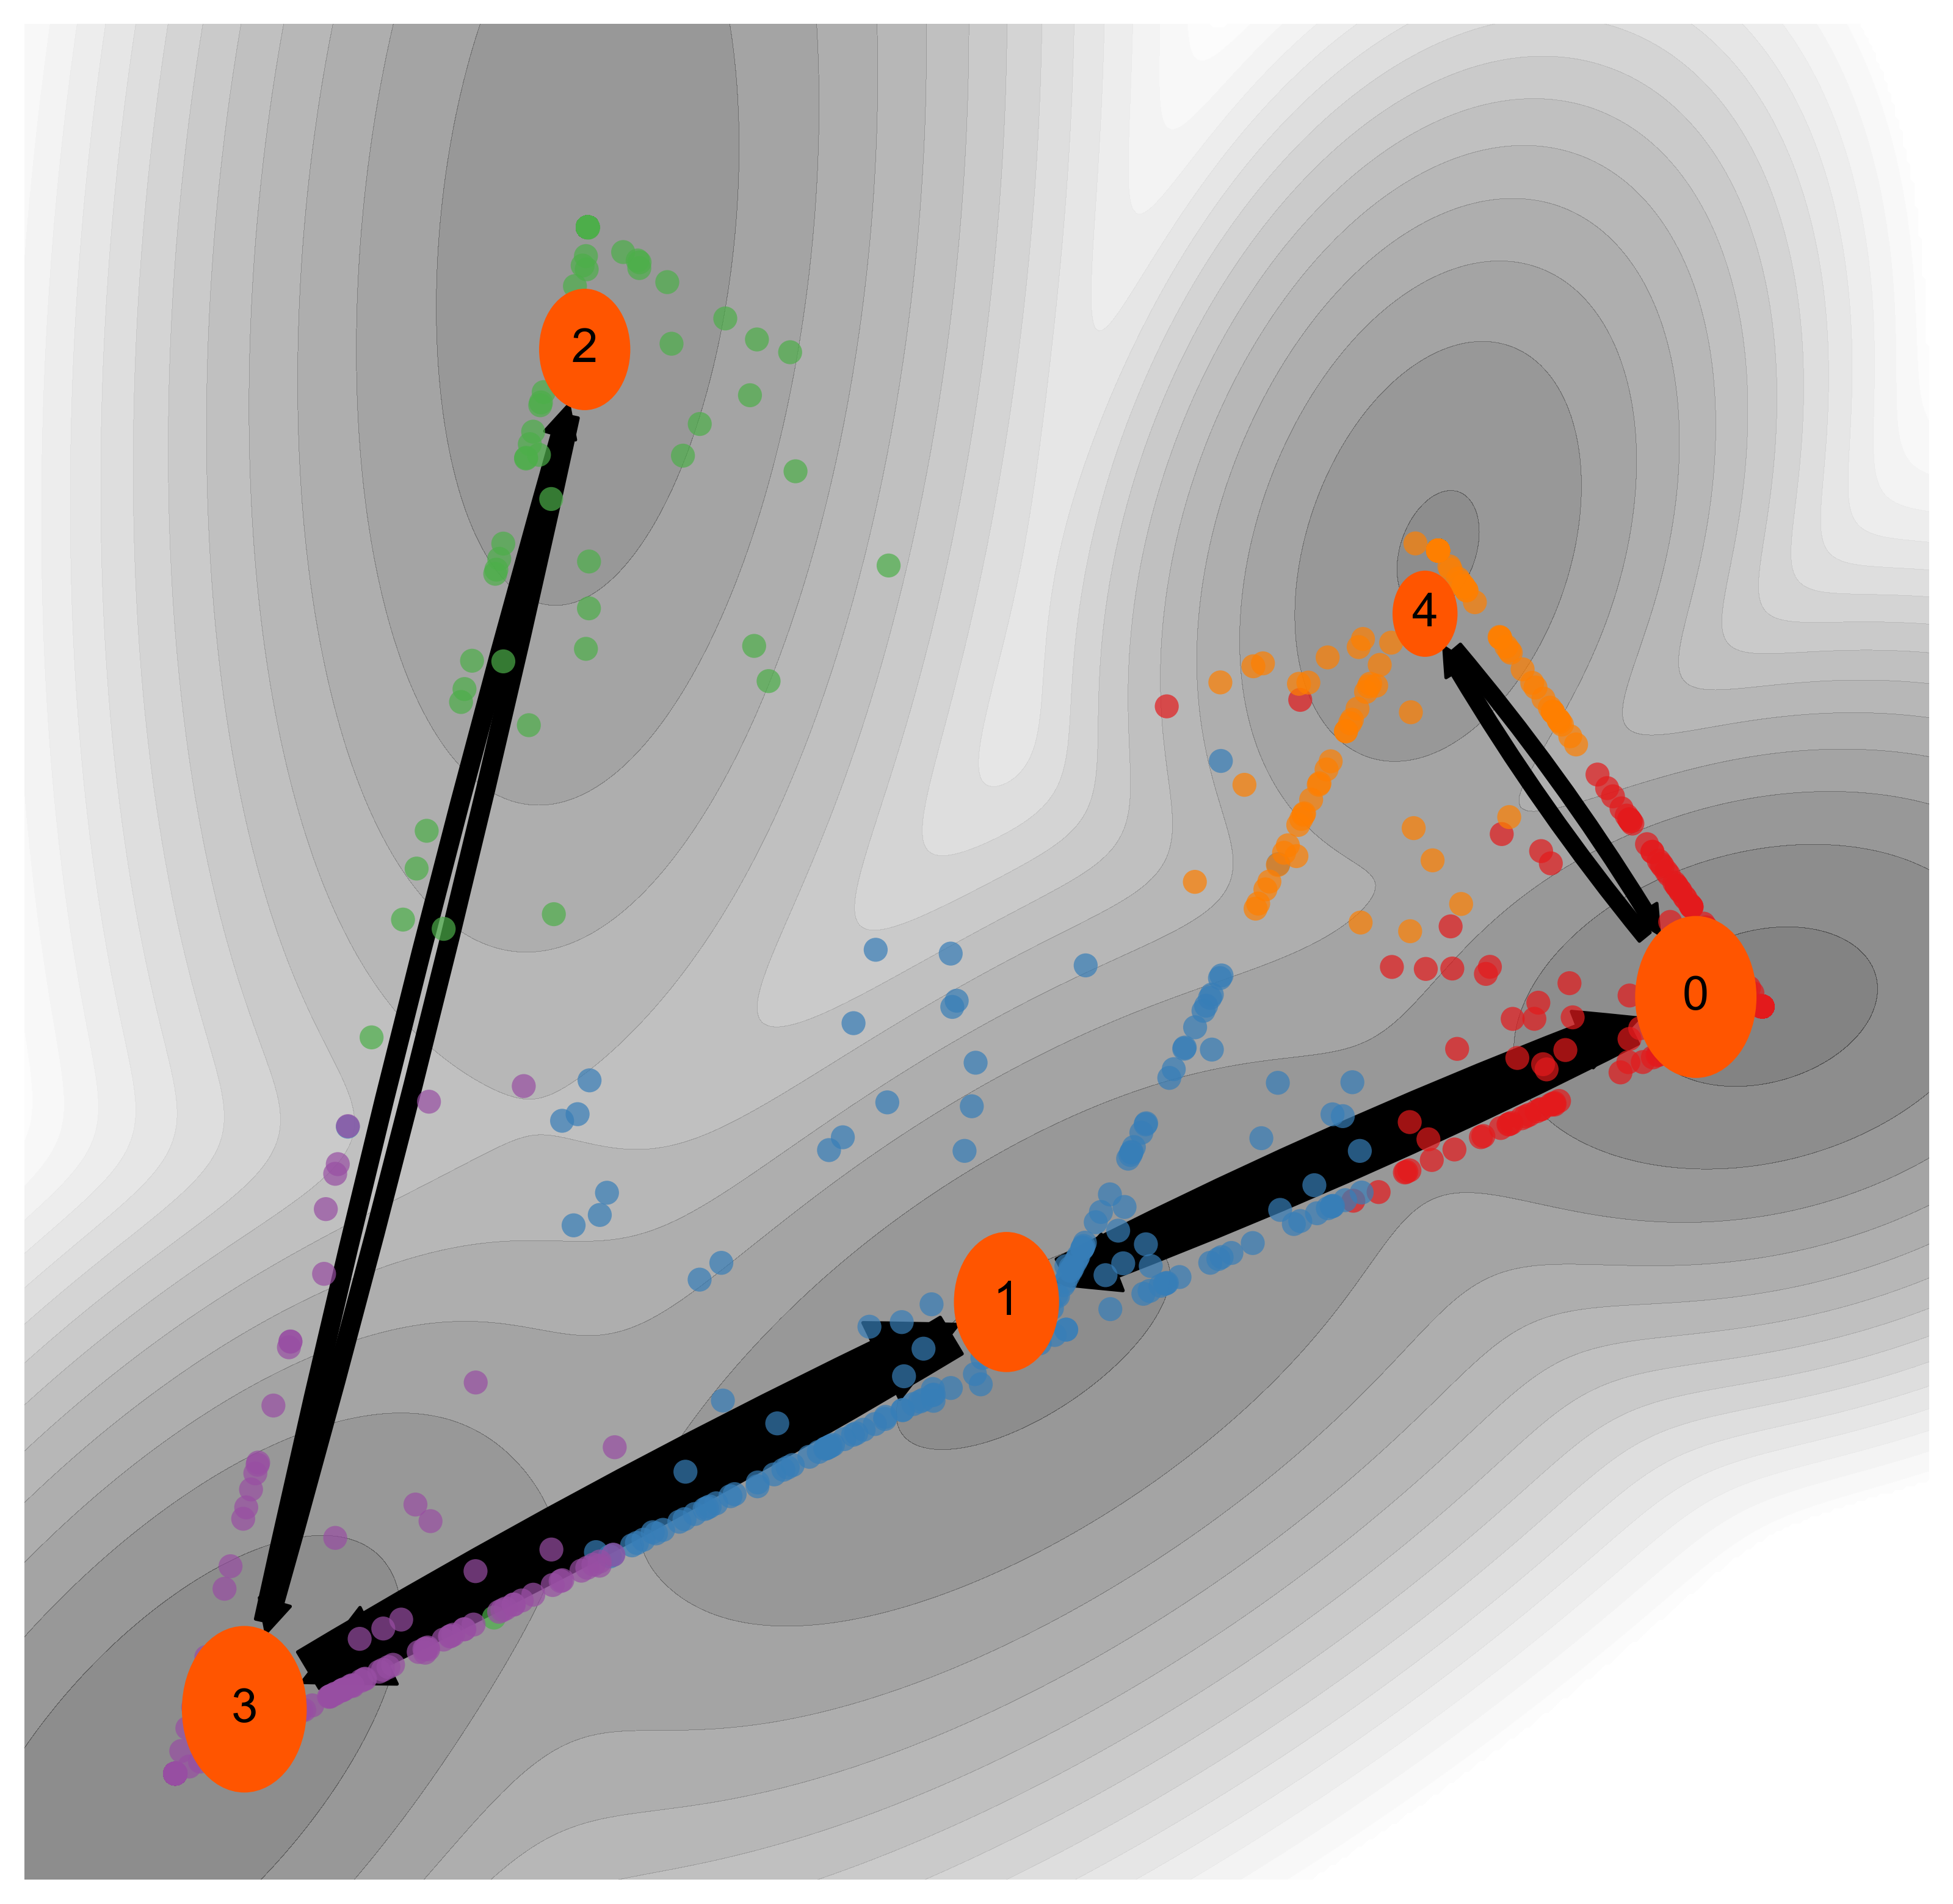

In [40]:
fig = plt.figure(figsize = (10,10))
pm.infer_lineage(adata, method = "MPFT",size_state = 0.2,size_text=16,alpha_point = 0.7)
fig.savefig('bm_reduction_mpft.pdf')

In [41]:
import importlib
import pyMuTrans as pm
importlib.reload(pm)
par = {"choice_distance":"cosine","K_cluster":5.0,"trials":50,"weight_scale":True,"initial":"pca","reduce_large_scale":False} 
adata = pm.dynamical_analysis(adata,par)

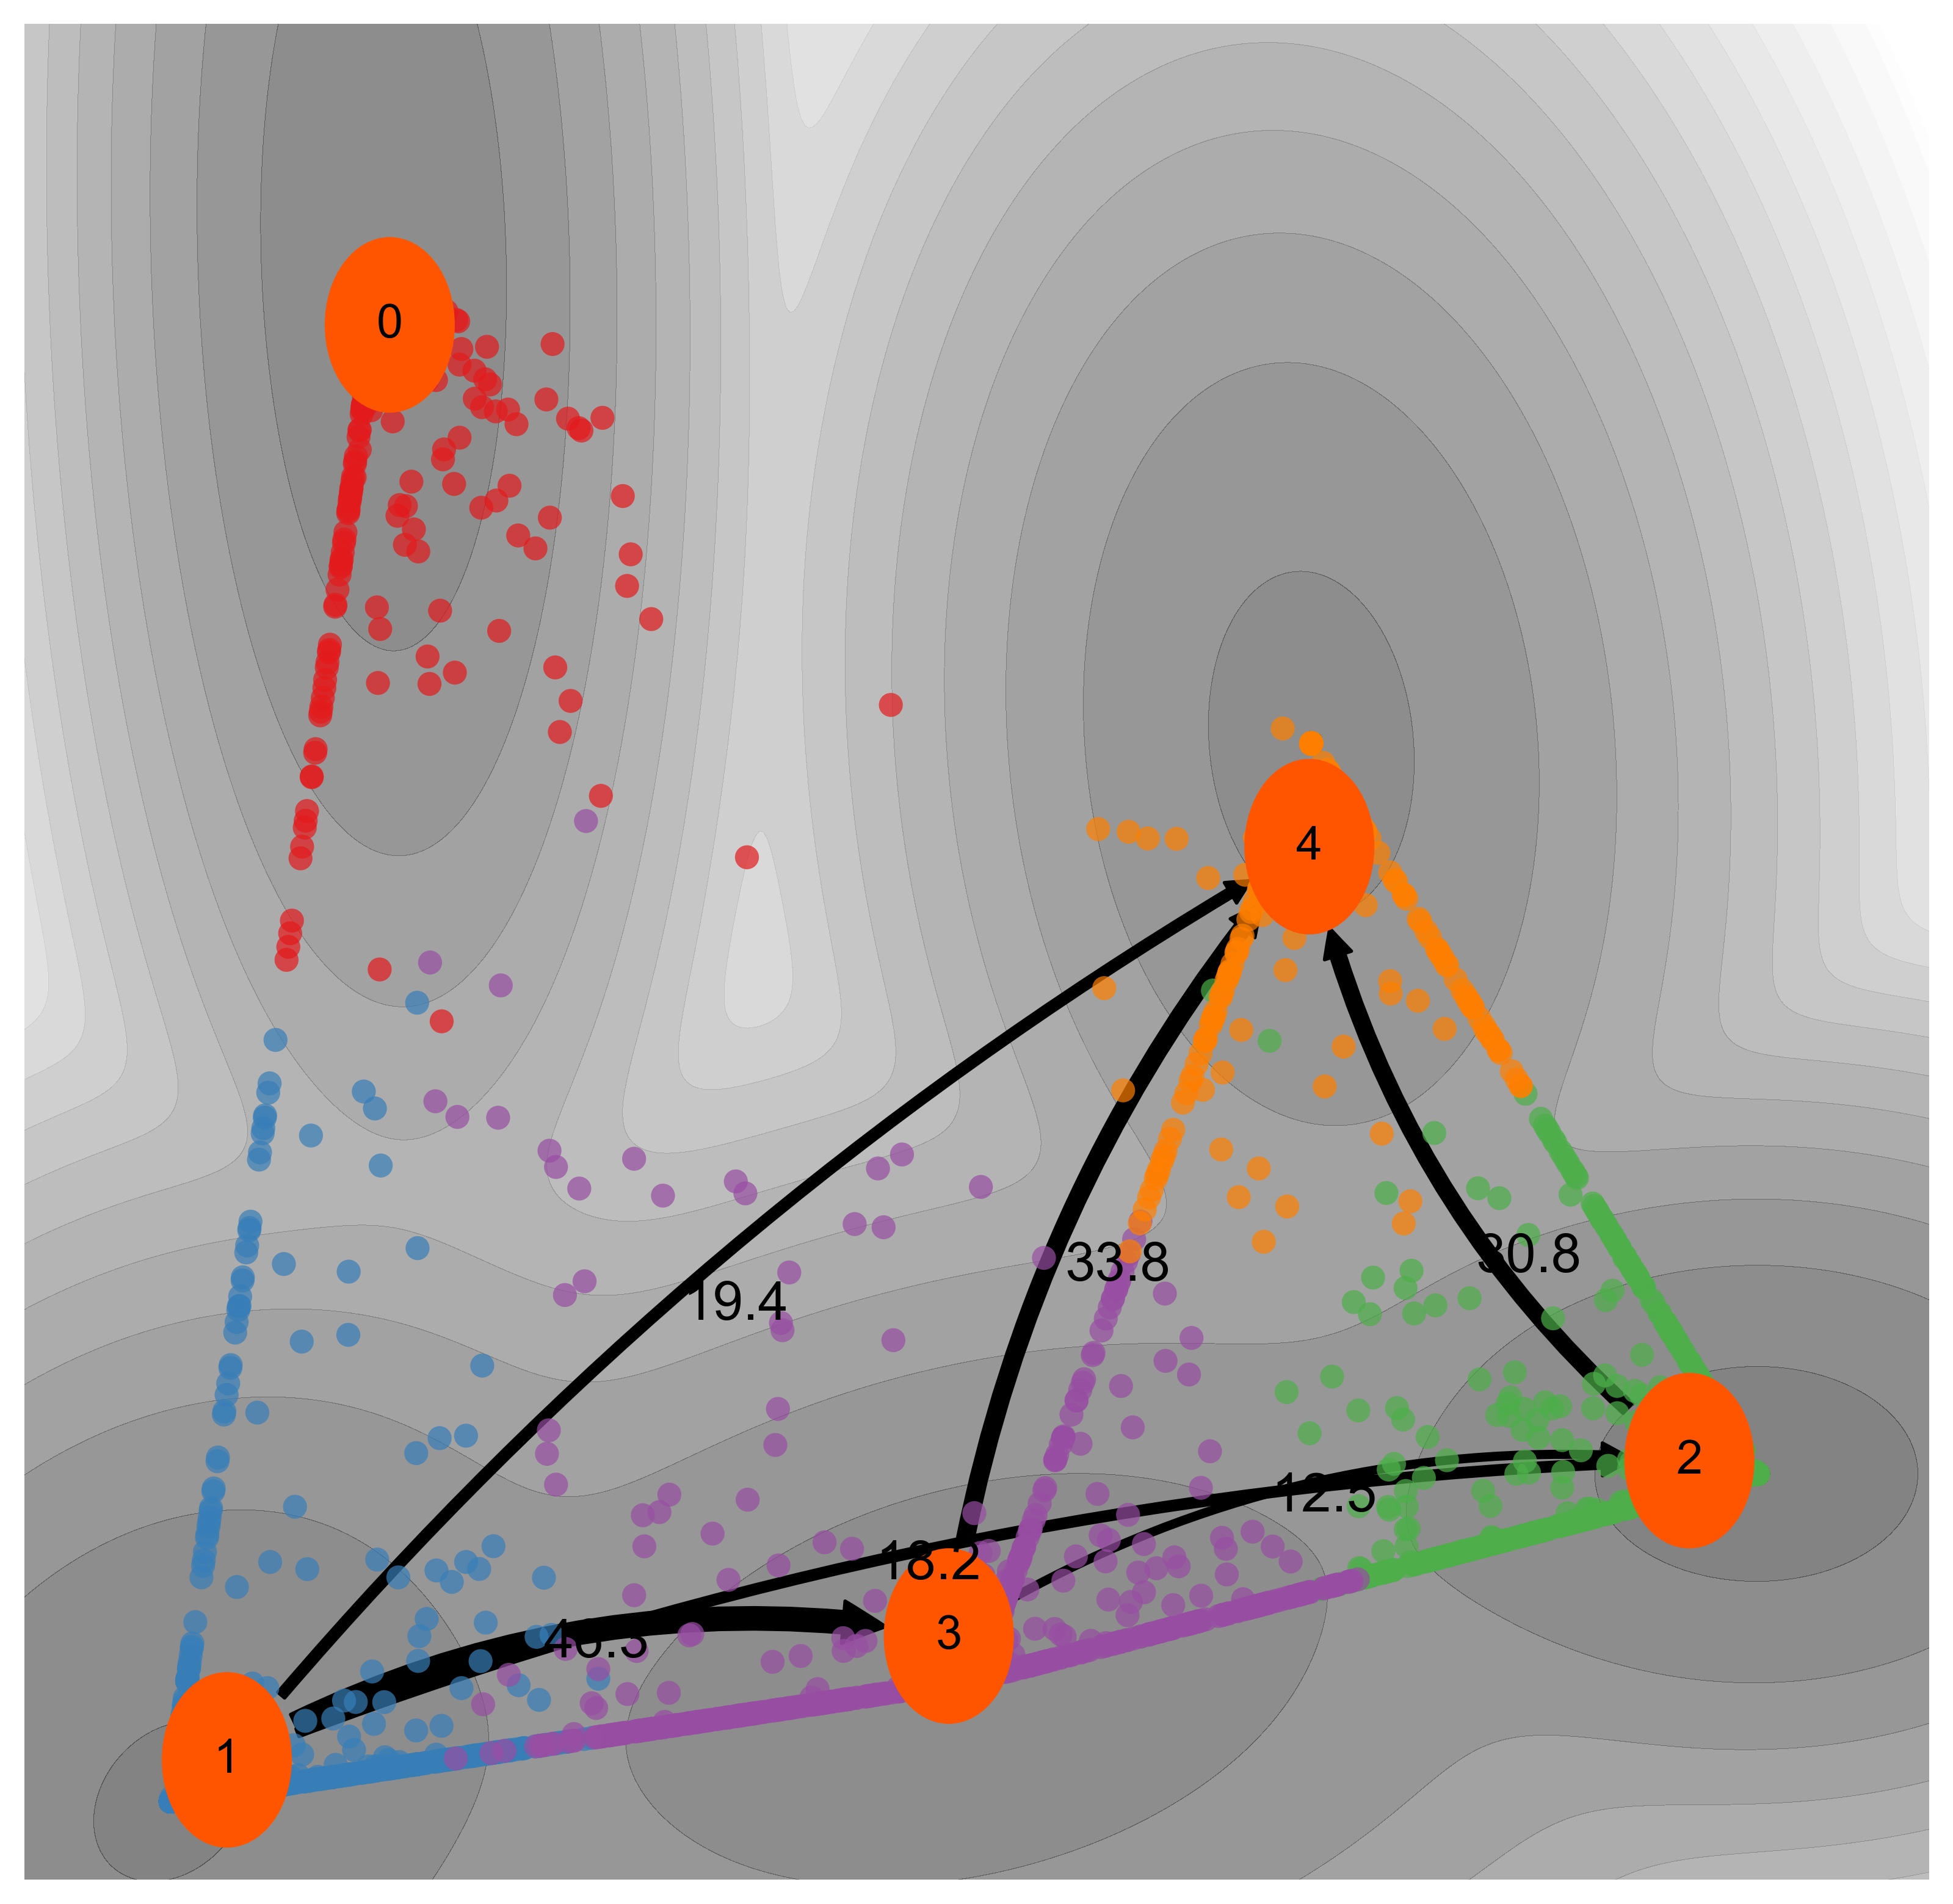

In [42]:
fig = plt.figure(figsize = (10,10))
pm.infer_lineage(adata,si=1,sf = 4,method = "MPPT",flux_fraction = 0.8,size_state = 0.2,size_text=16,alpha_point = 0.7)
fig.savefig('bm_whole_mppt.pdf')

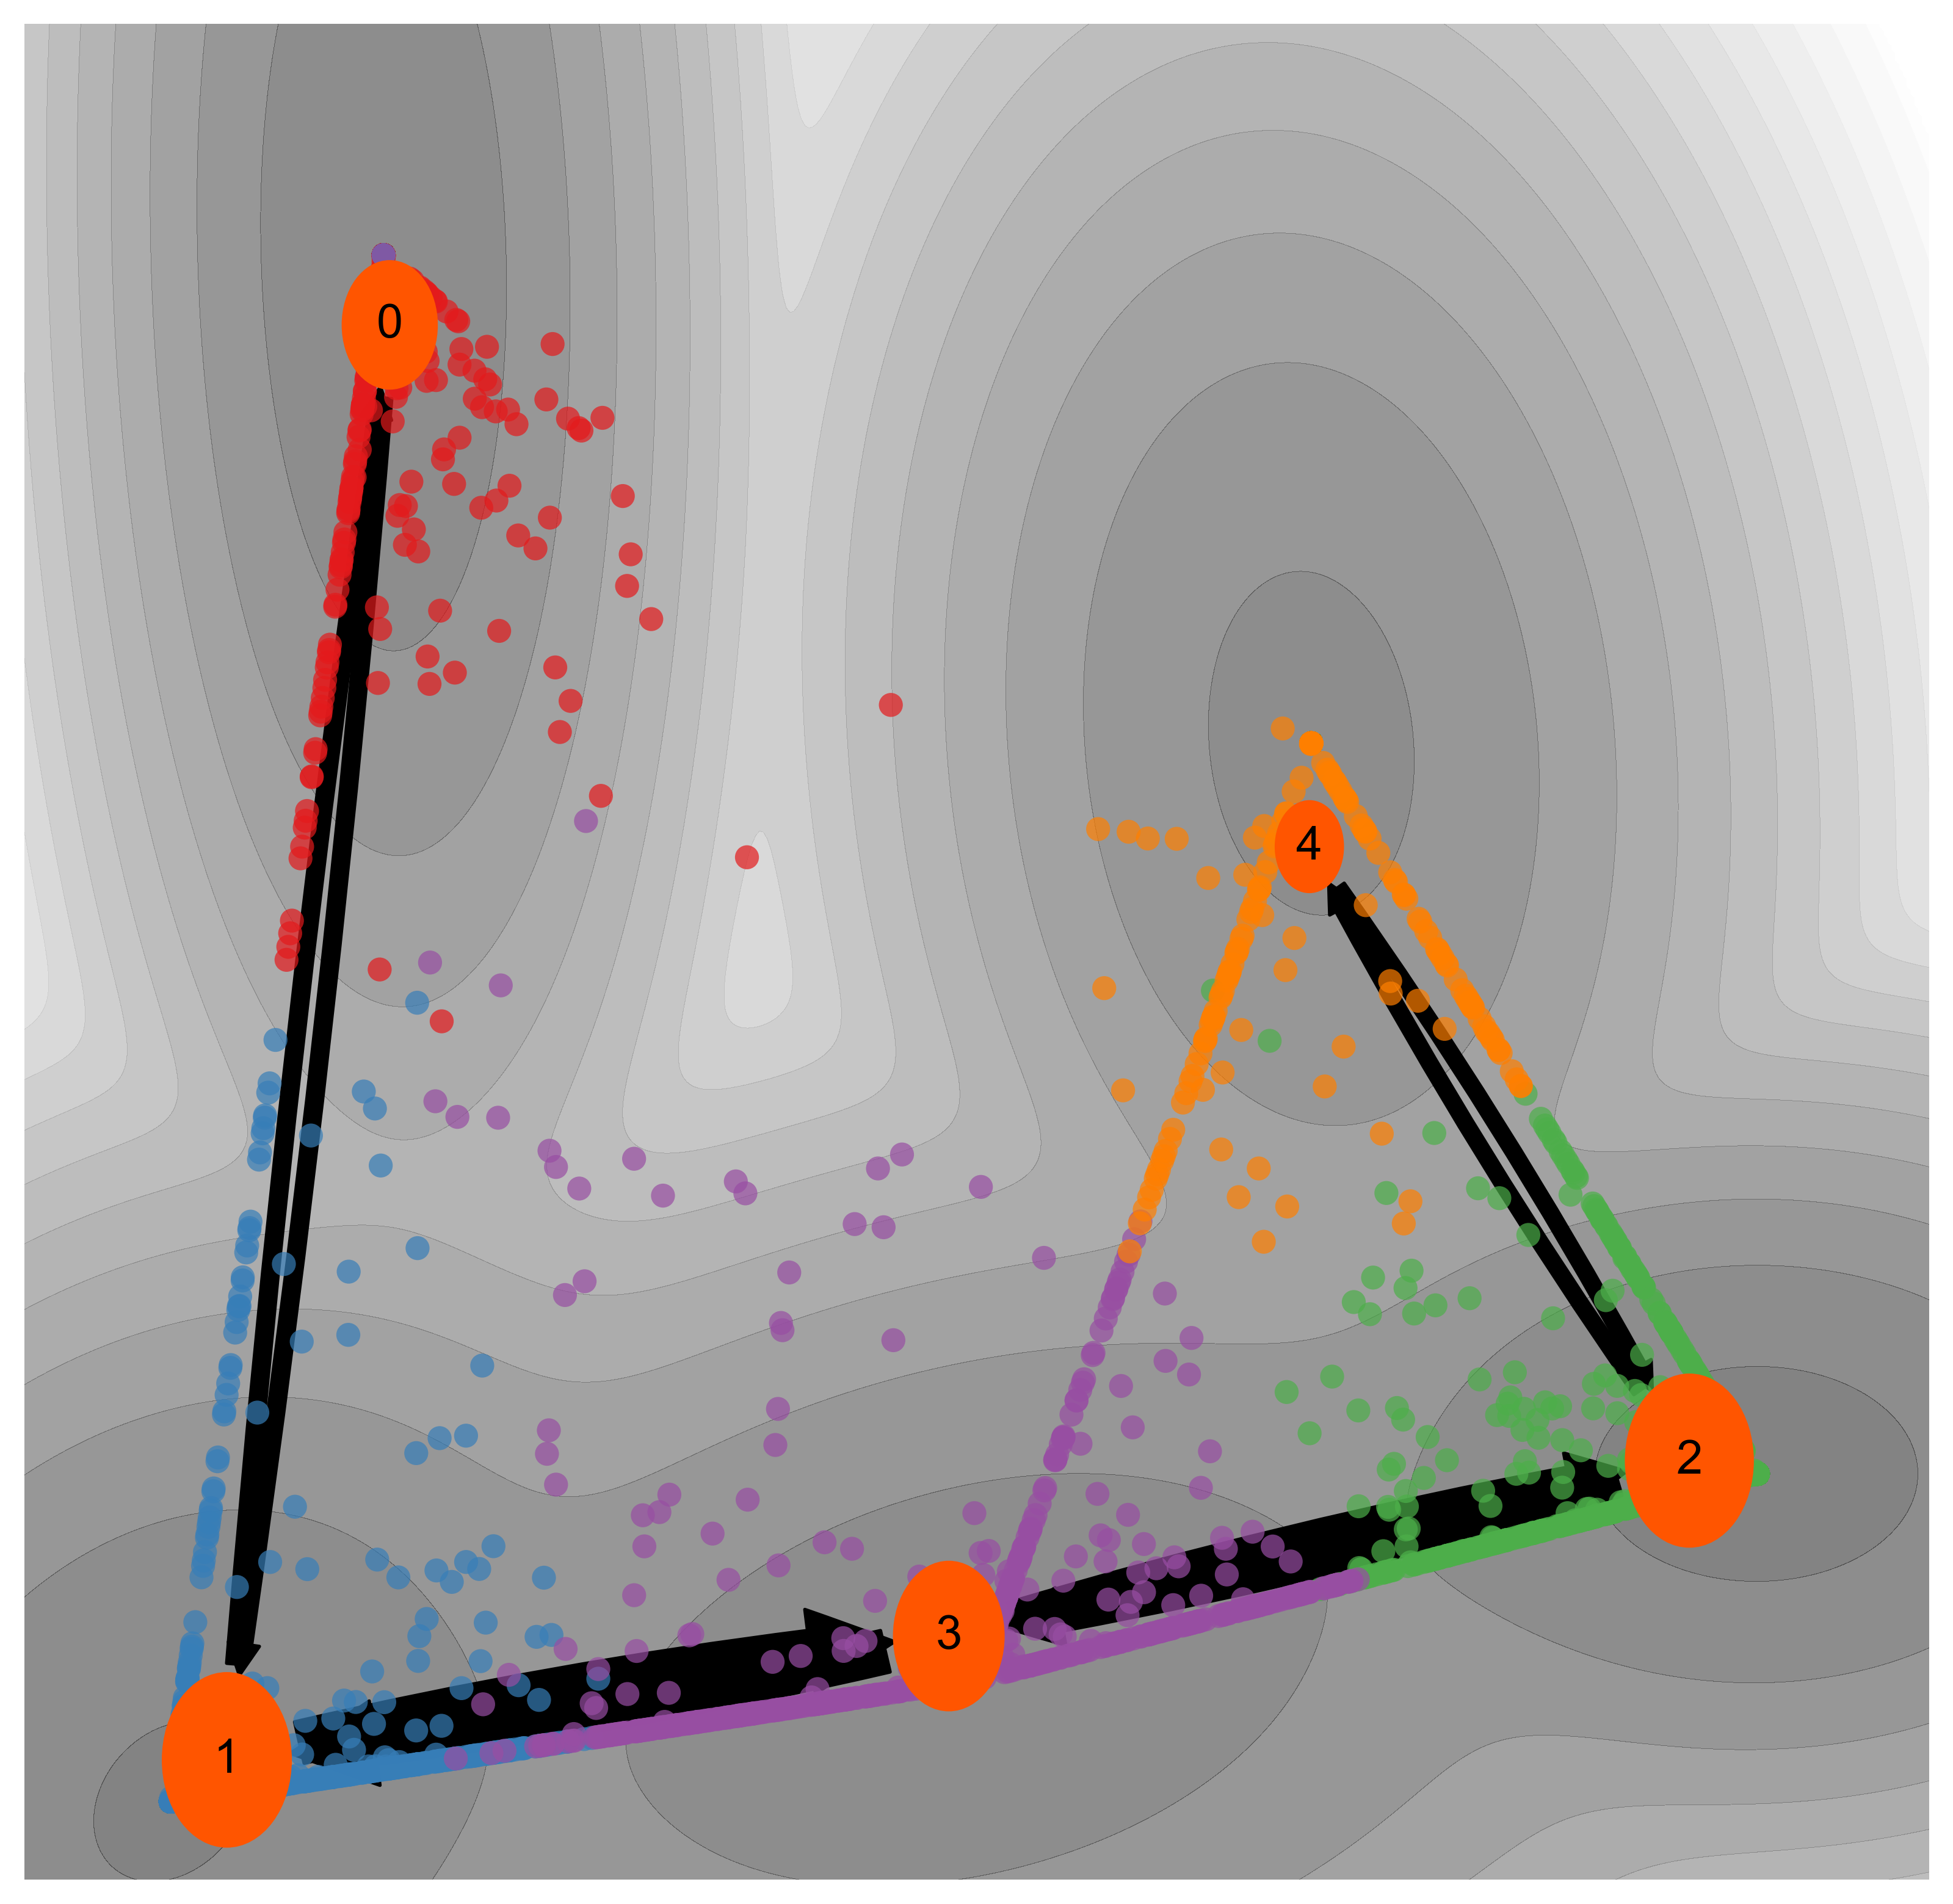

In [43]:
fig = plt.figure(figsize = (10,10))
pm.infer_lineage(adata,method = "MPFT",size_state = 0.2,size_text=16,alpha_point = 0.7)
fig.savefig('bm_whole_mpft.pdf')